In [1]:
from yadlt.load_data import load_bcdms_grid
from yadlt.model import generate_pdf_model
from yadlt.distribution import Distribution
import numpy as np

In [8]:
fk_grid = load_bcdms_grid()
nreplicas = 1000
seed = 4324123123
x = np.array(fk_grid).reshape(1, -1, 1)

xT3_log = Distribution("xT3 with (x,logx) at initialisation")
xT3 = Distribution("xT3 at initialisation")
for rep in range(nreplicas):
    
    model_log = generate_pdf_model(
        outputs=1,
        architecture=(25, 20),
        activations=["tanh", "tanh"],
        kernel_initializer="GlorotNormal",
        user_ki_args=None,
        seed=seed + rep,
        scaled_input=True,
        preprocessing=False,
    )
    model = generate_pdf_model(
        outputs=1,
        architecture=(25, 20),
        activations=["tanh", "tanh"],
        kernel_initializer="GlorotNormal",
        user_ki_args=None,
        seed=seed + rep,
        scaled_input=False,
        preprocessing=False,
    )
    xT3.add(model(x).numpy().reshape(-1))
    xT3_log.add(model_log(x).numpy().reshape(-1))
    

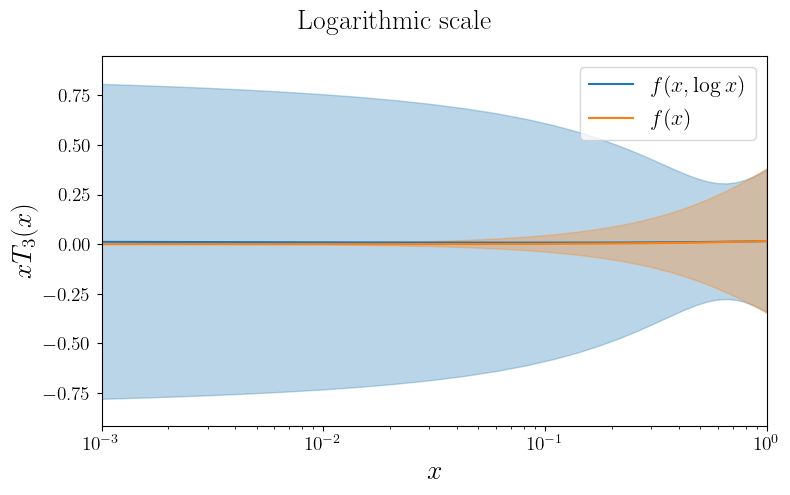

In [9]:
from yadlt.plotting.plotting import produce_plot
produce_plot(
  fk_grid ,
  [xT3_log, xT3],
  save_fig=False,
  xlabel=r'$x$',
  ylabel=r'$xT_3(x)$',
  labels=[r'$f(x, \log x)$', r'$f(x)$'],
  ax_specs={'set_xscale': 'log', 'set_xlim': (1e-3, 1) },
  title=r"$\textrm{Logarithmic scale}$"
)

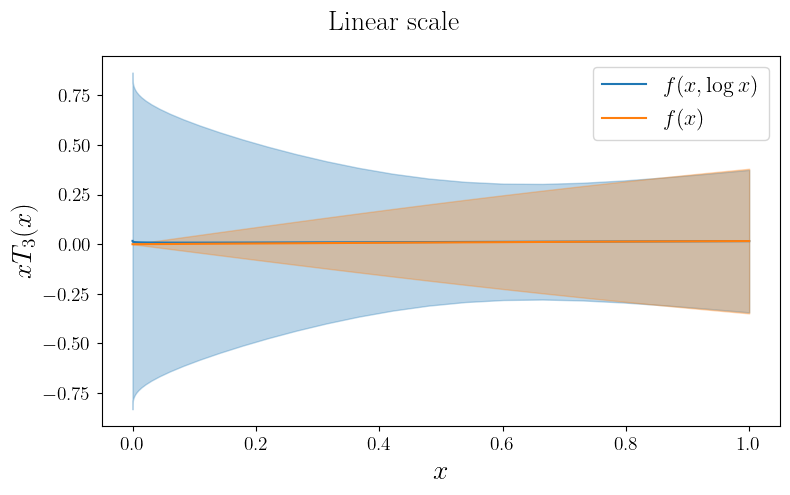

In [10]:
produce_plot(
  fk_grid ,
  [xT3_log, xT3],
  save_fig=False,
  xlabel=r'$x$',
  ylabel=r'$xT_3(x)$',
  labels=[r'$f(x, \log x)$', r'$f(x)$'],
  title=r"$\textrm{Linear scale}$"
  # ax_specs={'set_xscale': 'log', 'set_xlim': (1e-3, 1) }
)